In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### This is womens's clothing e-commerce reviews dataset . Each row corresponds to a customer review, and includes the variables:

#### Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
#### Age: Positive Integer variable of the reviewers age.
#### Title: String variable for the title of the review.
#### Review Text: String variable for the review body.
#### Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
#### Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
#### Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
#### Division Name: Categorical name of the product high level division.
#### Department Name: Categorical name of the product department name.
#### Class Name: Categorical name of the product class name.

In [5]:
# Display maximun columns.
pd.set_option('Display.max_columns',None)
# Display maximum rows.
pd.set_option('Display.max_rows',None)

In [6]:
# Reading dataset.
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [7]:
# Checking first 5 rows of dataset.
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [8]:
# Removing the useless column
df = df.drop('Unnamed: 0', axis = 1)

In [9]:
# Checking first 5 rows of dataset.
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [10]:
# Checking shape of the dataset.
df.shape

(23486, 10)

In [11]:
# Checking size of the dataset.
df.size

234860

In [12]:
# Checking information of dataset. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [13]:
# Checking 5 point summary of dataset.
# It will consider only numerical columns.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Clothing ID,23486.0,918.118709,203.298980,0.0,861.0,936.0,1078.0,1205.0
Age,23486.0,43.198544,12.279544,18.0,34.0,41.0,52.0,99.0
Rating,23486.0,4.196032,1.110031,1.0,4.0,5.0,5.0,5.0
Recommended IND,23486.0,0.822362,0.382216,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,23486.0,2.535936,5.702202,0.0,0.0,1.0,3.0,122.0


In [14]:
# Checking summary of non-numeric columns.
df.describe(include = 'object').T

,count,unique,top,freq
Title,19676,13993,Love it!,136
Review Text,22641,22634,Perfect fit and i've gotten so many compliment...,3
Division Name,23472,3,General,13850
Department Name,23472,6,Tops,10468
Class Name,23472,20,Dresses,6319


In [15]:
# Checking for null values in the dataset.
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [16]:
# Checking number of unique content in each column.
df.nunique(axis = 0)

Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

In [17]:
# Checking correlation between numerical columns.
df.corr()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
Clothing ID,1.000000,0.017972,-0.018879,-0.016206,0.046356
Age,0.017972,1.000000,0.026831,0.030622,0.043079
Rating,-0.018879,0.026831,1.000000,0.792336,-0.064961
Recommended IND,-0.016206,0.030622,0.792336,1.000000,-0.069045
Positive Feedback Count,0.046356,0.043079,-0.064961,-0.069045,1.000000


#### There is a strong positive correlation between the Rating and Recommended IND.

### Creating new column.

In [18]:
# Replacing null values with empty space.
df['Title'] = df['Title'].replace({np.nan : ''})

In [19]:
# Checking for null values in the column.
df['Title'][df['Title'] == np.nan]

Series([], Name: Title, dtype: object)

In [20]:
# Replacing null values with the empty space.
df['Review Text'] = df['Review Text'].replace({np.nan : ''})

In [21]:
# Checking for null values in the column.
df['Review Text'][df['Review Text'] == np.nan]

Series([], Name: Review Text, dtype: object)

In [22]:
# Creating new column 'Review'
df['Review'] = df['Title'] + ' ' + df['Review Text']

In [23]:
# Checking the dataset with new column
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review
0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and com...
1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happen...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


In [24]:
# Checking for number of empty spaces in the new column.
df['Review'][df['Review'] == ' ']

92        
93        
98        
135       
142       
165       
168       
192       
201       
248       
265       
298       
323       
342       
345       
400       
425       
455       
493       
519       
523       
527       
536       
542       
554       
562       
571       
574       
580       
611       
686       
707       
728       
732       
737       
753       
758       
797       
805       
892       
893       
974       
1004      
1030      
1046      
1201      
1298      
1315      
1344      
1366      
1425      
1454      
1471      
1485      
1534      
1562      
1573      
1582      
1611      
1643      
1660      
1703      
1717      
1720      
1764      
1817      
1835      
1928      
2063      
2081      
2103      
2149      
2160      
2174      
2219      
2242      
2251      
2313      
2323      
2362      
2387      
2410      
2412      
2466      
2468      
2487      
2519      
2520      
2560      
2571      
2739      

In [25]:
# Replacing the spaces present in the new column with null value.
df['Review'] = df['Review'].replace({' ' : np.nan})

In [26]:
# Checking for number of null vallues in the new column.
df['Review'].isnull().sum()

844

In [27]:
# Dropping the 'Title' and 'Review Text' columns.
df = df.drop(['Title','Review Text'], axis = 1)

In [28]:
# Checking the dataset
df.head()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review
0,767,33,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and com...
1,1080,34,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happen...
2,1077,60,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,1049,50,5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,847,47,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


In [29]:
# Checking shape of the dataset.
df.shape

(23486, 9)

### Null value treatment.

In [30]:
# Checking the total null values.
df.isnull().sum()

Clothing ID                  0
Age                          0
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
Review                     844
dtype: int64

In [31]:
# Dropping the rows which contains null values in Review column.
df = df.dropna(subset = ['Review'])

In [32]:
# Checking for null values in dataset.
df.isnull().sum()

Clothing ID                 0
Age                         0
Rating                      0
Recommended IND             0
Positive Feedback Count     0
Division Name              13
Department Name            13
Class Name                 13
Review                      0
dtype: int64

In [33]:
# Dropping rows which contains null values in the 'Division Name' column.
df = df.dropna(subset = ['Division Name'])

In [34]:
# Checking for null values in dataset.
df.isna().sum()

Clothing ID                0
Age                        0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
Review                     0
dtype: int64

In [35]:
# Checking shape of the dataset after dropping the rows with null values.
df.shape

(22629, 9)

### Checking value counts.

In [36]:
# Checking the values counts.
df['Clothing ID'].value_counts()

1078    987
862     778
1094    735
1081    561
872     519
829     512
1110    471
868     414
895     384
936     348
867     333
850     324
1095    323
863     291
1077    287
1059    287
1086    283
1080    280
860     276
1083    244
861     228
873     223
1092    219
828     213
1033    212
927     207
1056    206
820     202
836     197
1022    195
1072    191
1008    180
1104    176
984     166
831     158
1020    157
877     152
833     152
854     145
834     143
1082    142
864     141
835     139
1099    133
1035    132
865     127
940     126
907     125
1087    124
909     121
1025    119
875     115
866     114
975     113
1068    110
830     105
1037    103
823     102
1060    101
886     100
824      90
1089     90
825      89
1066     89
903      88
996      85
876      83
1009     83
1098     82
941      81
1028     81
939      80
949      77
1096     77
1047     76
964      73
1084     72
1075     69
1030     69
1038     67
881      66
857      66
883      65
945 

In [37]:
# Checking number of unique elements.
df['Clothing ID'].nunique()

1172

In [38]:
# Checking the value Counts.
df['Age'].value_counts()

39    1225
35     851
36     799
34     765
38     751
37     726
41     717
33     698
46     691
42     625
48     605
44     596
32     594
40     584
43     554
31     549
47     544
53     536
45     511
29     503
49     473
56     462
52     421
26     413
28     406
54     390
51     385
50     384
30     383
57     350
60     335
62     333
27     330
25     319
59     316
55     314
58     274
66     273
23     244
64     240
24     235
63     234
65     220
61     220
67     154
22     140
68     135
69     112
20     105
21      98
70      88
74      50
71      49
72      45
83      43
73      40
19      40
75      25
77      18
79      15
78      15
82      13
80      10
76      10
85       6
84       6
81       5
89       5
18       4
87       4
91       4
94       3
93       2
90       2
86       2
99       2
92       1
Name: Age, dtype: int64

In [39]:
# Checking number of unique elements.
df['Age'].nunique()

77

In [40]:
# Checking the % of value counts.
df['Recommended IND'].value_counts(normalize = True) * 100

1    81.877237
0    18.122763
Name: Recommended IND, dtype: float64

In [41]:
# Checking the value counts.
df['Positive Feedback Count'].value_counts()

0      10322
1       4041
2       2193
3       1433
4        922
5        672
6        525
7        374
8        319
9        261
10       225
11       178
12       146
14       121
13       102
15        94
17        81
16        74
18        62
19        54
20        40
23        31
21        30
22        29
25        25
28        24
26        23
24        21
27        20
30        18
31        17
29        15
32        10
42         9
37         9
38         8
34         7
33         6
35         6
36         6
51         5
81         4
65         4
43         4
45         4
39         4
57         3
40         3
41         3
44         3
47         3
53         2
49         2
46         2
55         2
58         2
66         1
50         1
64         1
94         1
48         1
98         1
78         1
82         1
59         1
93         1
69         1
87         1
71         1
54         1
89         1
108        1
117        1
122        1
77         1
84         1
68         1

In [42]:
# Checking number of unique elements.
df['Positive Feedback Count'].nunique()

82

In [43]:
# Checking the value counts.
df['Division Name'].value_counts()

General           13366
General Petite     7837
Initmates          1426
Name: Division Name, dtype: int64

In [44]:
# Checking the % of value counts.
df['Division Name'].value_counts(normalize = True) * 100

General           59.065801
General Petite    34.632551
Initmates          6.301648
Name: Division Name, dtype: float64

In [45]:
# Checking the value counts.
df['Department Name'].value_counts()

Tops        10048
Dresses      6146
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: Department Name, dtype: int64

In [46]:
# Checking the % of value counts.
df['Department Name'].value_counts(normalize = True) * 100

Tops        44.403199
Dresses     27.159839
Bottoms     16.182774
Intimate     7.304786
Jackets      4.427946
Trend        0.521455
Name: Department Name, dtype: float64

In [47]:
# Checking the value counts.
df['Class Name'].value_counts()

Dresses           6146
Knits             4626
Blouses           2983
Sweaters          1380
Pants             1350
Jeans             1104
Fine gauge        1059
Skirts             903
Jackets            683
Lounge             669
Swim               332
Outerwear          319
Shorts             304
Sleep              214
Legwear            158
Intimates          147
Layering           132
Trend              118
Casual bottoms       1
Chemises             1
Name: Class Name, dtype: int64

In [48]:
# Checking the % of value counts.
df['Class Name'].value_counts(normalize = True) * 100

Dresses           27.159839
Knits             20.442795
Blouses           13.182200
Sweaters           6.098369
Pants              5.965796
Jeans              4.878695
Fine gauge         4.679836
Skirts             3.990455
Jackets            3.018251
Lounge             2.956383
Swim               1.467144
Outerwear          1.409696
Shorts             1.343409
Sleep              0.945689
Legwear            0.698219
Intimates          0.649609
Layering           0.583322
Trend              0.521455
Casual bottoms     0.004419
Chemises           0.004419
Name: Class Name, dtype: float64

In [49]:
# Checking number of unique elememts.
df['Class Name'].nunique()

20

In [50]:
# Checking the value counts.
df['Rating'].value_counts()

5    12528
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

In [51]:
# Checking the % of value counts.
df['Rating'].value_counts(normalize = True) * 100

5    55.362588
4    21.688983
3    12.475143
2     6.845199
1     3.628088
Name: Rating, dtype: float64

#### Around 55 % data rating is 5 and around 4 % data rating is 1.

### Univariate Analysis.

In [52]:
# Checking the column names of the dataset.
df.columns

Index(['Clothing ID', 'Age', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name', 'Review'],
      dtype='object')

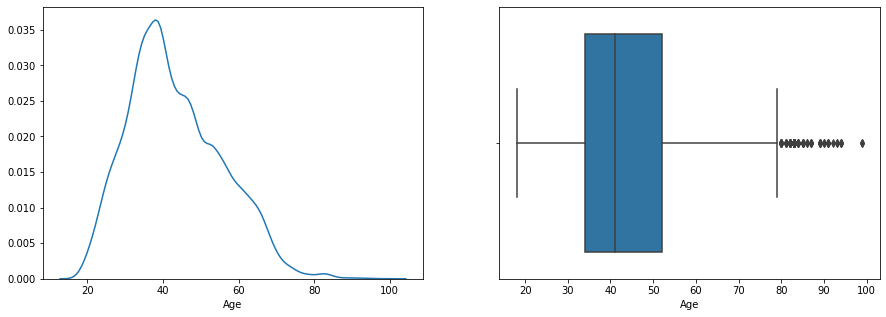

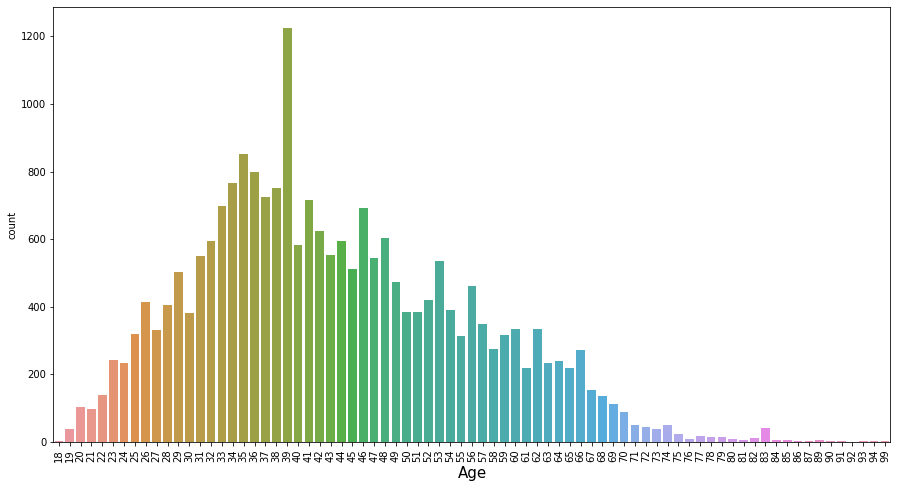

In [53]:
# Age.

fig, axes = plt.subplots(1,2, figsize = (15,5))
sns.distplot(df['Age'],hist = False, ax = axes[0])
sns.boxplot(data = df, x = 'Age', ax = axes[1])
plt.show()

plt.figure(figsize = (15,8))
sns.countplot(data = df, x = 'Age')
plt.xlabel('Age',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

#### Age data is right skewed data.
#### Data has few outliers present on the higher side of the age above 80.
#### Major 50% of the reviews are written by the women of age between 33 and 52.
#### Most reviews are written by the women of age 39 which is above 1200.
#### Least reviews are written by the women of age less than 19 and greater than 83.

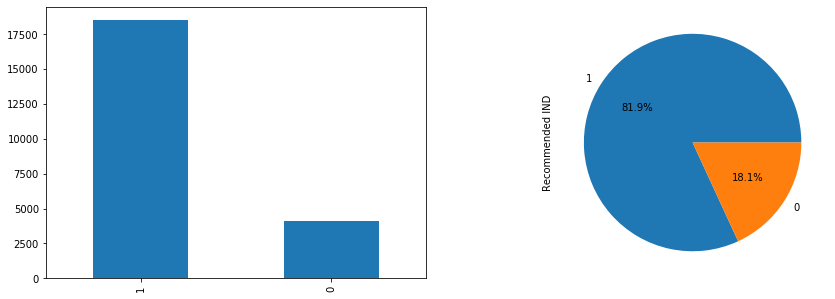

In [54]:
# Recommended IND.

fig, axes = plt.subplots(1,2, figsize = (15,5))
df['Recommended IND'].value_counts().plot(kind = 'bar', ax = axes[0])
df['Recommended IND'].value_counts().plot(kind = 'pie', autopct = '%.1f%%', ax = axes[1])
plt.show()

#### People who recommended the product are more as compared to the people who did not recommended the product.
#### People who recommended the product are 81.9% and who did not are 18.1%.
#### People who recommended the product are above 17500 and who did not are less than 5000. 

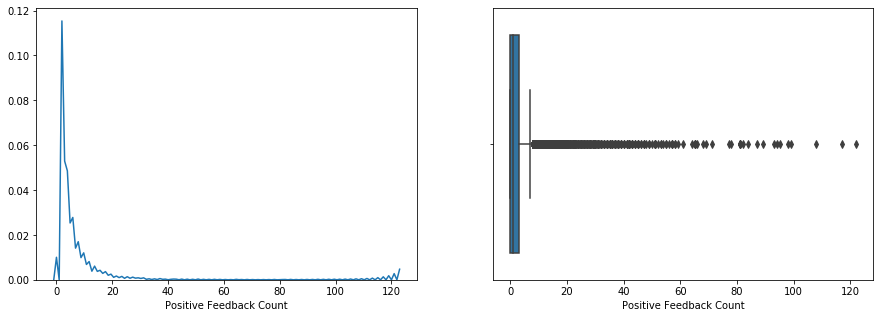

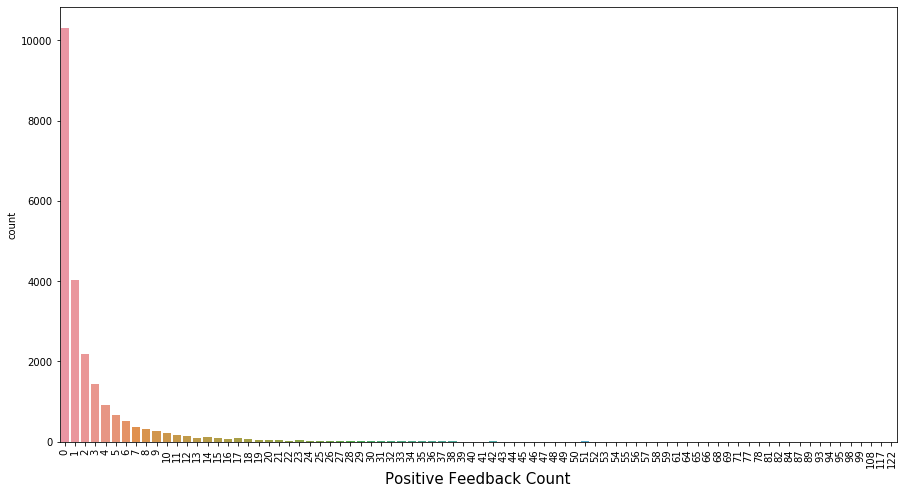

In [55]:
# Positive Feedback Count.

fig, axes = plt.subplots(1,2, figsize = (15,5))
sns.distplot(df['Positive Feedback Count'], hist = False, ax = axes[0])
sns.boxplot(data = df, x = 'Positive Feedback Count', ax = axes[1])
plt.show()

plt.figure(figsize = (15,8))
sns.countplot(data = df, x = 'Positive Feedback Count')
plt.xlabel('Positive Feedback Count', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

#### The Positive Feedback Count data is highly right skewed.
#### Data has large number of outliers present on the higher side of the count above 8.
#### Major 50% of the reviews has either 0 or 1 or 2 positive feedback counts.
#### Most number of reviews has 0 positive feedback count.

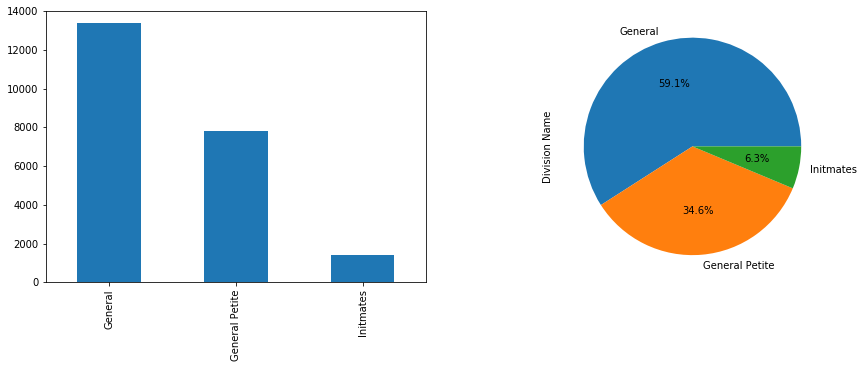

In [56]:
# Division Name.

fig, axes = plt.subplots(1,2, figsize = (15,5))
df['Division Name'].value_counts().plot(kind = 'bar', ax = axes[0])
df['Division Name'].value_counts().plot(kind = 'pie', autopct = '%.1f%%', ax = axes[1])
plt.show()

#### Most reviews are written on the General Division as compared to other Divisions; which are above 13000.
#### Least reviews are written on the Intimates Division as compared to the other Divisions; which are less than 2000.
#### General Petite Division has moderate number of reviews around 8000.
#### Percentage of Reviews : General Division - 59.1%, General Petite Division - 34.6%, Intimates Division - 6.3%.

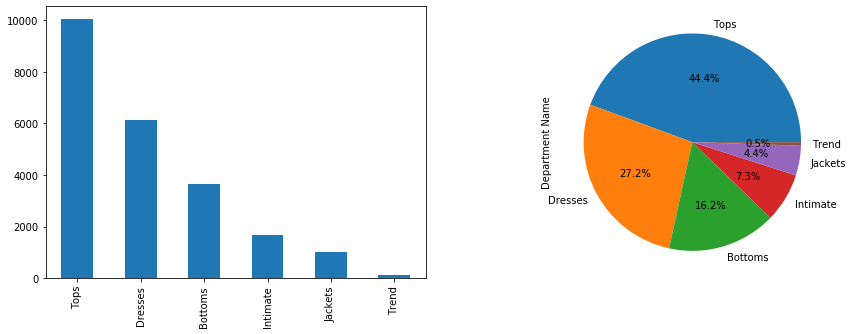

In [57]:
# Department Name.

fig, axes = plt.subplots(1,2, figsize = (15,5))
df['Department Name'].value_counts().plot(kind = 'bar', ax = axes[0])
df['Department Name'].value_counts().plot(kind = 'pie', autopct = '%.1f%%', ax = axes[1])
plt.show()

#### Most reviews are written on the Tops Department as compared to other Departments; which are around 10000 (44.4%).
#### Least reviews are written on the Trend Department as compared to other Departments; which are very much less (0.5%).

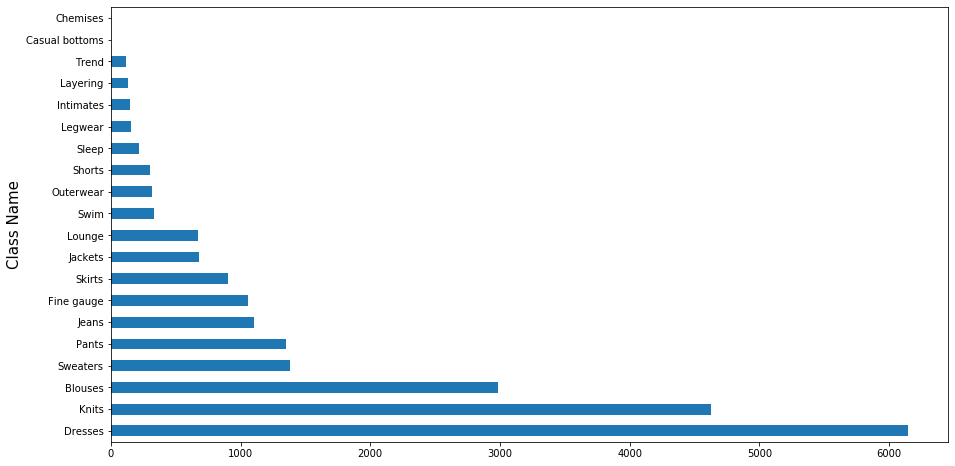

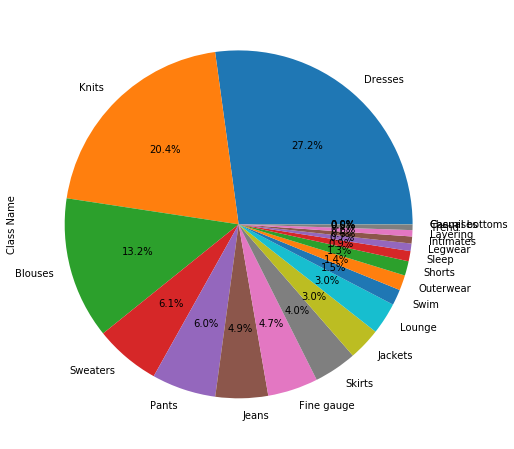

In [58]:
# Class Name.

plt.figure(figsize = (15,8))
df['Class Name'].value_counts().plot(kind = 'barh')
plt.ylabel('Class Name', fontsize = 15)
plt.show()

plt.figure(figsize = (15,8))
df['Class Name'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')
plt.show()

#### Most reviews are written on the Dresses Class as compared to other Classes; which are above 6000 (27.2%).
#### Least reviews are written on the Casual bottoms and Chemises Classes as compared to other Classes; which are very much less.

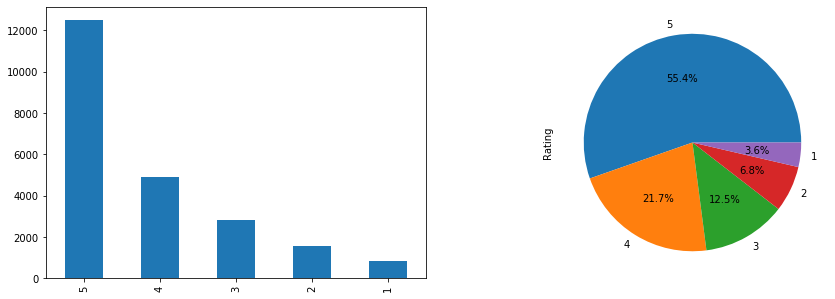

In [59]:
# Rating.

fig, axes = plt.subplots(1,2, figsize = (15,5))
df['Rating'].value_counts().plot(kind = 'bar', ax = axes[0])
df['Rating'].value_counts().plot(kind = 'pie', autopct = '%.1f%%', ax = axes[1])
plt.show()

#### Most Ratings are of 5 star; which are above 12000 (55.4%).
#### Least Ratings are of 1 star; which are less than 1000 (3.6%).

### Bivariate Analysis.

#### Quantitative - Quantitative.

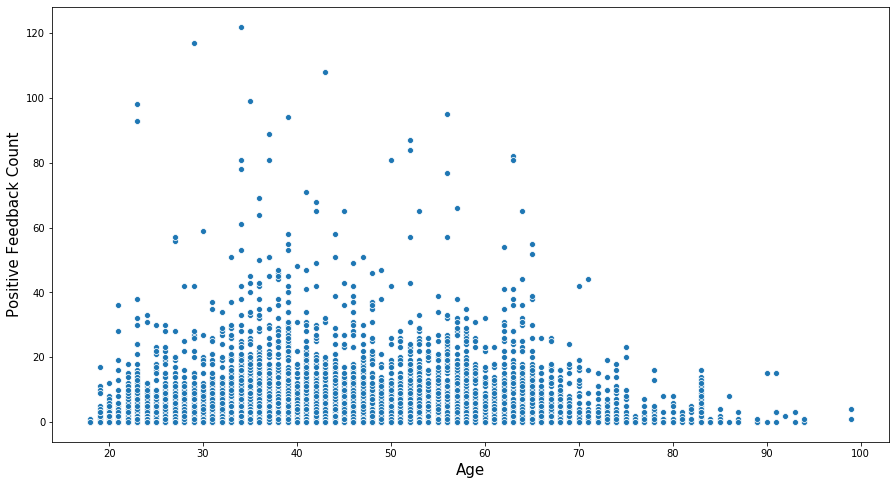

In [60]:
# Quantitative - Quantitative.

# Age vs Positive Feedback Count.

plt.figure(figsize = (15,8))
sns.scatterplot(data = df, x = 'Age', y = 'Positive Feedback Count')
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Positive Feedback Count', fontsize = 15)
plt.show()

#### No correlation between Age of the person who has written review and Positive Feedback Count for the review.
#### Majority of data lies between the age of 30 to 65.
#### Few outliers are present at the higher end of the Positive Feedback Count, i.e; above 100.

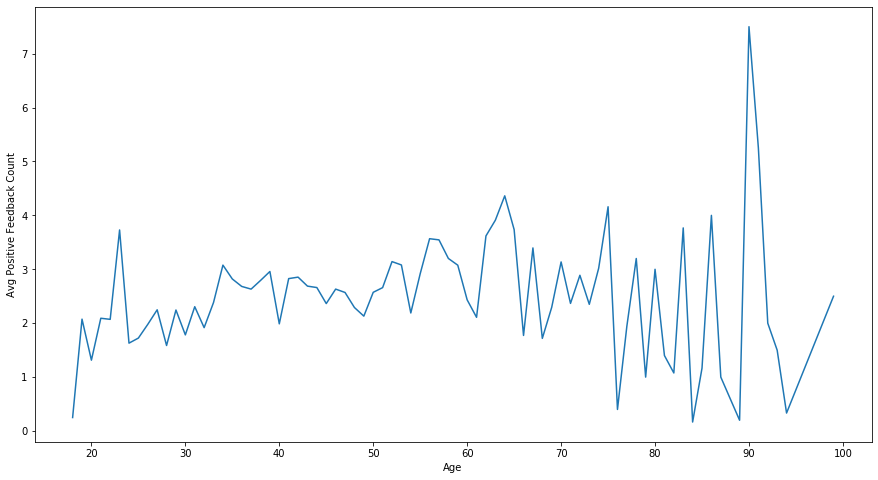

In [61]:
# Quantitative - Quantitative.

# Age vs Positive Feedback Count.

plt.figure(figsize = (15,8))
df.groupby(['Age'])['Positive Feedback Count'].mean().plot(kind = 'line')
plt.ylabel('Avg Positive Feedback Count')
plt.show()

#### The magnitude of fluctuation of the Average Positive Feedback Count increases as the Age increases.

#### Quantitative - Qualitative.

In [62]:
# Checking the column names of the dataset.
df.columns

Index(['Clothing ID', 'Age', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name', 'Review'],
      dtype='object')

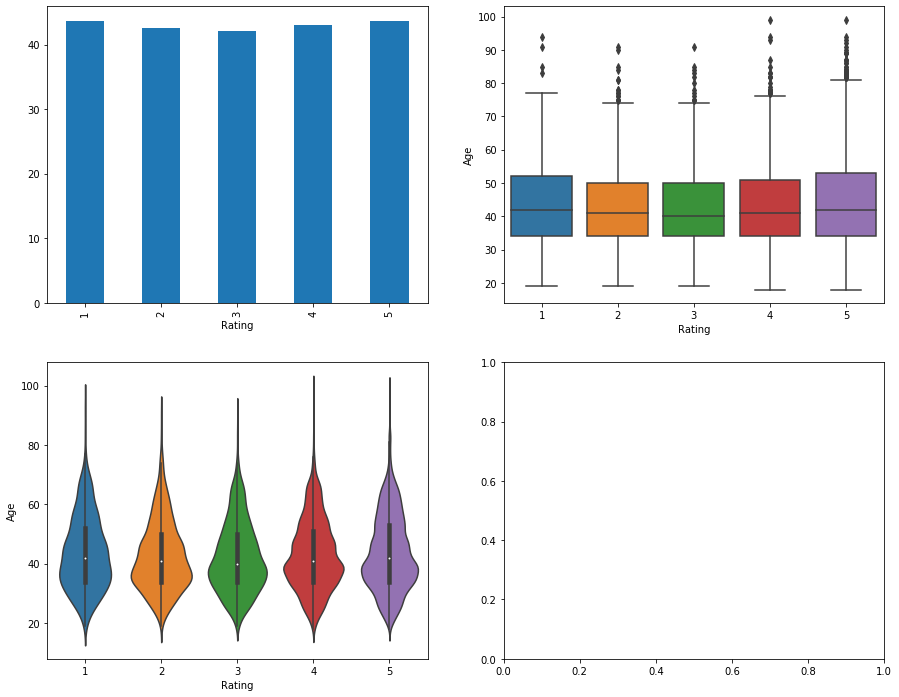

In [63]:
# Quantitative - Qualitative.

# Age vs Rating.

fig, axes = plt.subplots(2,2, figsize = (15,12))
df.groupby(['Rating'])['Age'].mean().plot(kind = 'bar', ax = axes[0,0])
sns.boxplot(data = df, x = 'Rating', y = 'Age', ax = axes[0,1])
sns.violinplot(data = df, x = 'Rating', y = 'Age', ax = axes[1,0])
plt.show()

#### Average age of the people who had given 1,2,3,4 and 5 star rating are around 40 years. 

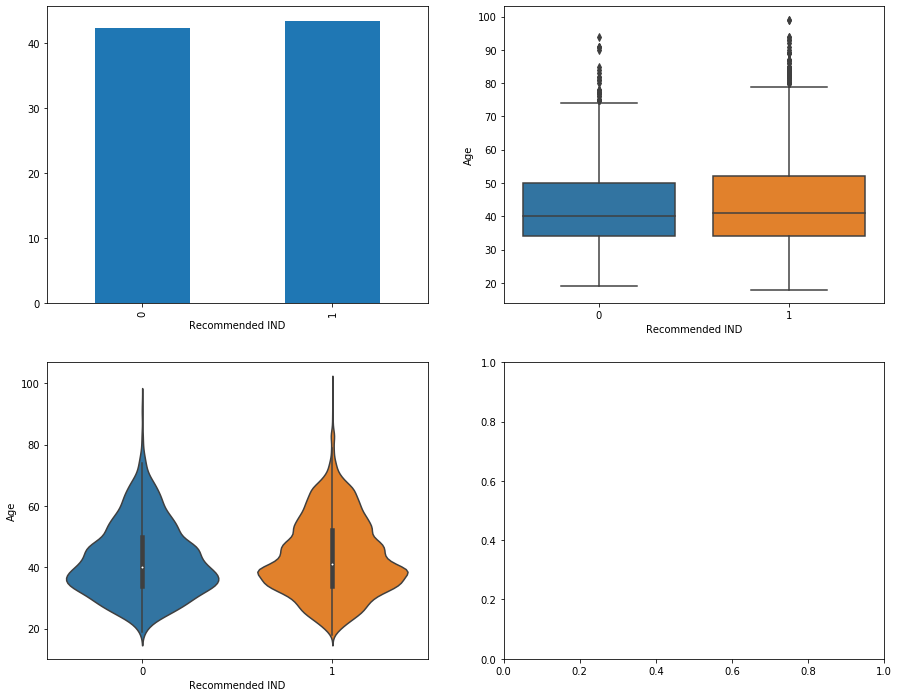

In [64]:
# Quantitative - Qualitative.

# Age vs Recommended IND.

fig, axes = plt.subplots(2,2, figsize = (15,12))
df.groupby(['Recommended IND'])['Age'].mean().plot(kind = 'bar', ax = axes[0,0])
sns.boxplot(data = df, x = 'Recommended IND', y = 'Age', ax = axes[0,1])
sns.violinplot(data = df, x = 'Recommended IND', y = 'Age', ax= axes[1,0])
plt.show()

#### Average age of the people who recommended the product and who did not recommended the product are same around 40 years.

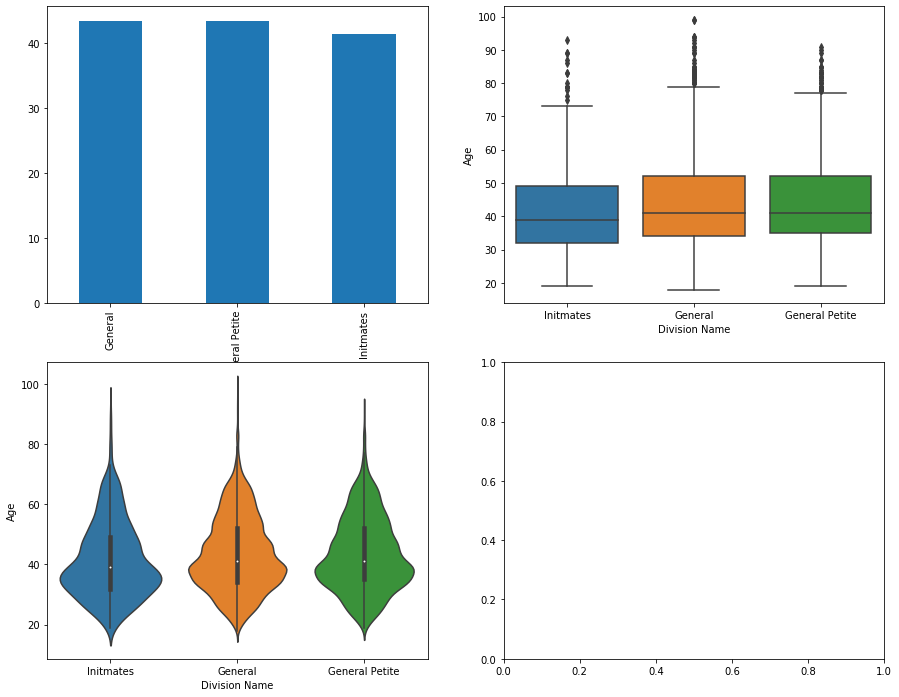

In [65]:
# Quantitative - Qualitative.

# Age vs Division Name.

fig, axes = plt.subplots(2,2, figsize = (15,12))
df.groupby(['Division Name'])['Age'].mean().plot(kind = 'bar', ax = axes[0,0])
sns.boxplot(data = df, x = 'Division Name', y = 'Age', ax = axes[0,1])
sns.violinplot(data = df, x = 'Division Name', y = 'Age', ax = axes[1,0])
plt.show()

#### Average age of the people who has written reviews on all the Division products are almost same around 40.

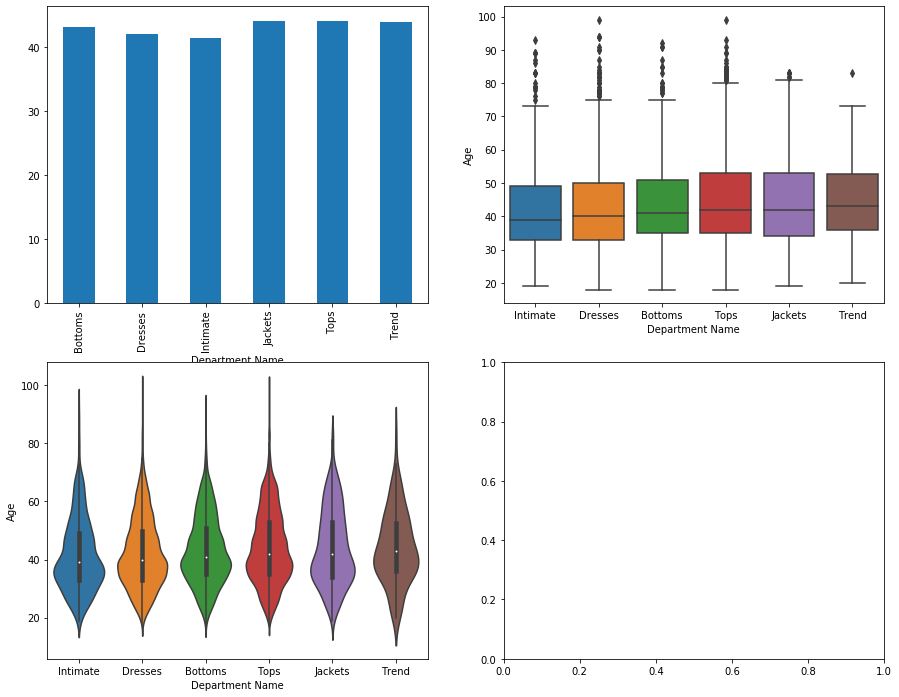

In [66]:
# Quantitative - Qualitative.

# Age vs Department Name.

fig, axes = plt.subplots(2,2, figsize = (15,12))
df.groupby(['Department Name'])['Age'].mean().plot(kind = 'bar', ax = axes[0,0])
sns.boxplot(data = df, x = 'Department Name', y = 'Age', ax = axes[0,1])
sns.violinplot(data = df, x = 'Department Name', y = 'Age', ax = axes[1,0])
plt.show()

#### Average age of the people who has written reviews on all the Department products are almost same around 40.

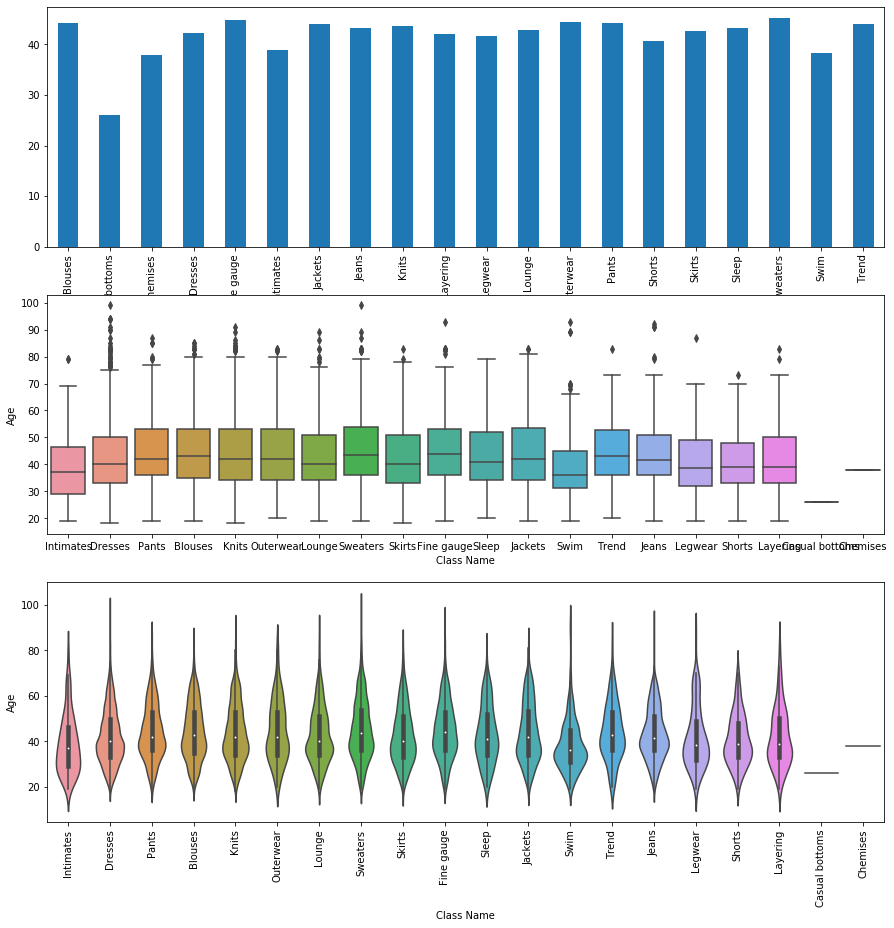

In [67]:
# Quantitative - Qualitative.

# Age vs Class Name.

fig, axes = plt.subplots(3,1, figsize = (15,15))
df.groupby(['Class Name'])['Age'].mean().plot(kind = 'bar', ax = axes[0])
sns.boxplot(data = df, x = 'Class Name', y = 'Age', ax = axes[1])
sns.violinplot(data = df, x = 'Class Name', y = 'Age', ax = axes[2])
plt.xticks(rotation = 90)
plt.show()

#### Average age of the people who has written reviews for the Bottoms, Chemises, Intimates, Swim, Legwear and shorts Classes are less than 40 years.
#### Average age of the people who has written reviews for rest of the Classes are above 40 years.

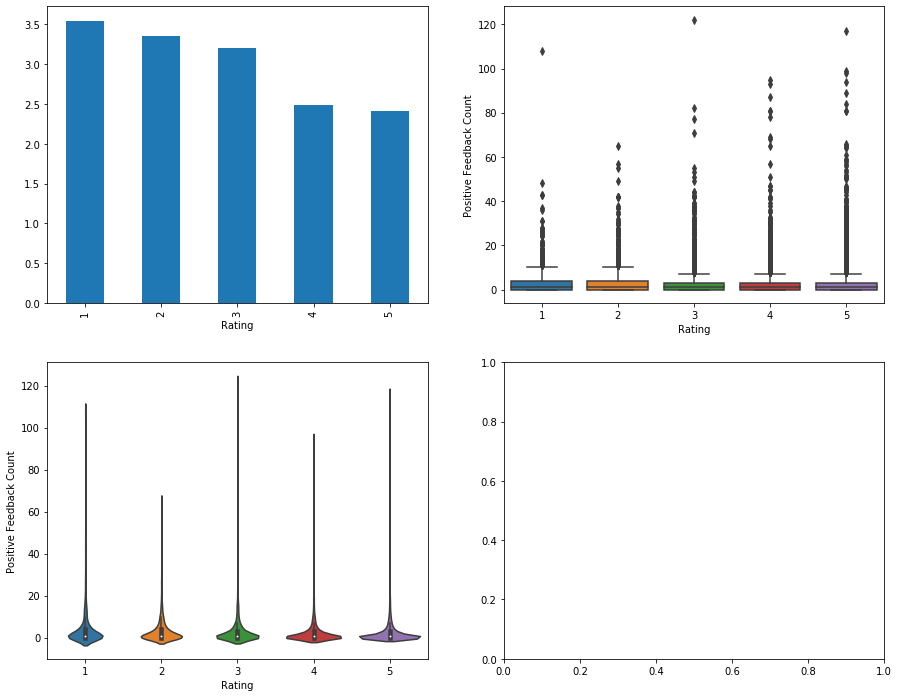

In [68]:
# Quantitative - Qualitative.

# Positive Feedback Count vs Rating.

fig, axes = plt.subplots(2,2, figsize = (15,12))
df.groupby(['Rating'])['Positive Feedback Count'].mean().plot(kind = 'bar', ax = axes[0,0])
sns.boxplot(data = df, x = 'Rating', y = 'Positive Feedback Count', ax = axes[0,1])
sns.violinplot(data = df, x = 'Rating', y = 'Positive Feedback Count', ax = axes[1,0])
plt.show()

#### Average Positive Feedback Count for 1,2 and 3 star rating are around 3.
#### Average Positive Feedback Count for 4 and 5 star rating are around 2.
#### We can also see that majority of the rating/reviews has very less or 0 Positive Feedback Count.

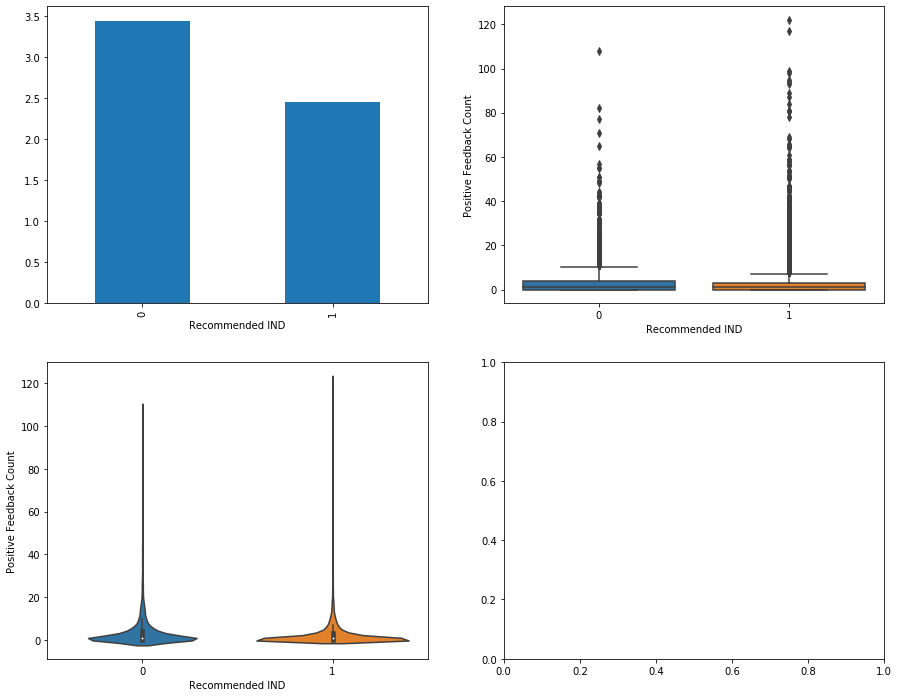

In [69]:
# Quantitative - Qualitative.

# Positive Feedback Count vs Recommended IND.

fig, axes = plt.subplots(2,2, figsize = (15,12))
df.groupby(['Recommended IND'])['Positive Feedback Count'].mean().plot(kind = 'bar', ax = axes[0,0])
sns.boxplot(data = df, x = 'Recommended IND', y = 'Positive Feedback Count', ax = axes[0,1])
sns.violinplot(data = df, x = 'Recommended IND', y = 'Positive Feedback Count', ax = axes[1,0])
plt.show()

#### Average Positive Feedback Count for the product which is not recommended is around 3.
#### Average Positive Feedback Count for the product which is recommended is around 2.
#### We can also see that majority of the recommended reviews and not recommended reviews has very less or 0 Positive Feedback Count.

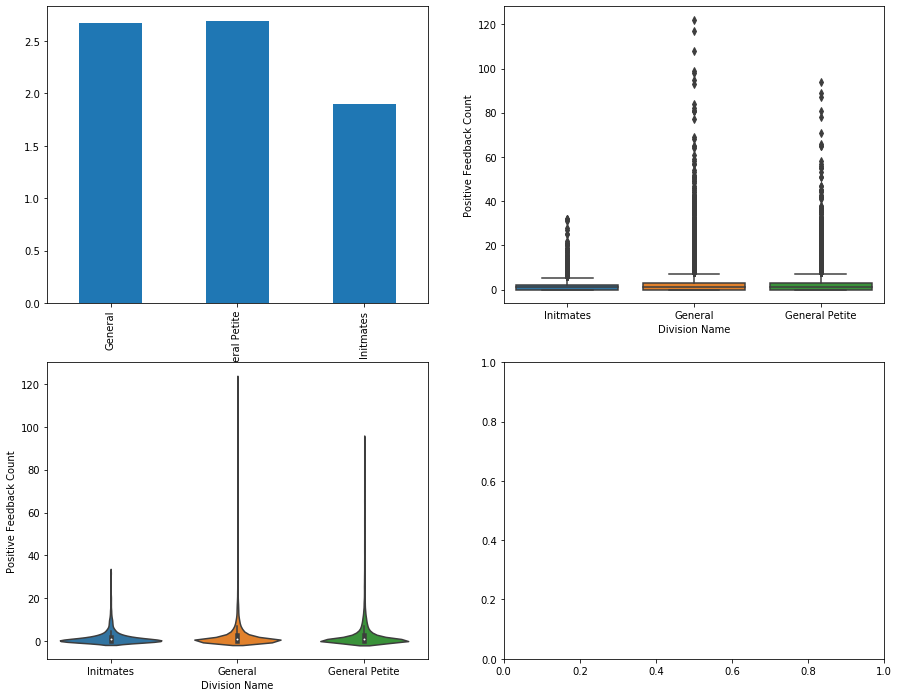

In [70]:
# Quantitative - Qualitative.

# Positive Feedback Count vs Division Name.

fig, axes = plt.subplots(2,2, figsize = (15,12))
df.groupby(['Division Name'])['Positive Feedback Count'].mean().plot(kind = 'bar', ax = axes[0,0])
sns.boxplot(data = df, x = 'Division Name', y = 'Positive Feedback Count', ax = axes[0,1])
sns.violinplot(data = df, x = 'Division Name', y = 'Positive Feedback Count', ax = axes[1,0])
plt.show()

#### Average Positive Feedback Count for General and General Petite Division are around 3.
#### Average Positive Feedback Count for Intitmates Division is around 2.
#### We can also see that majority of the Divisions reviews has very less or 0 Positive Feedback Count.

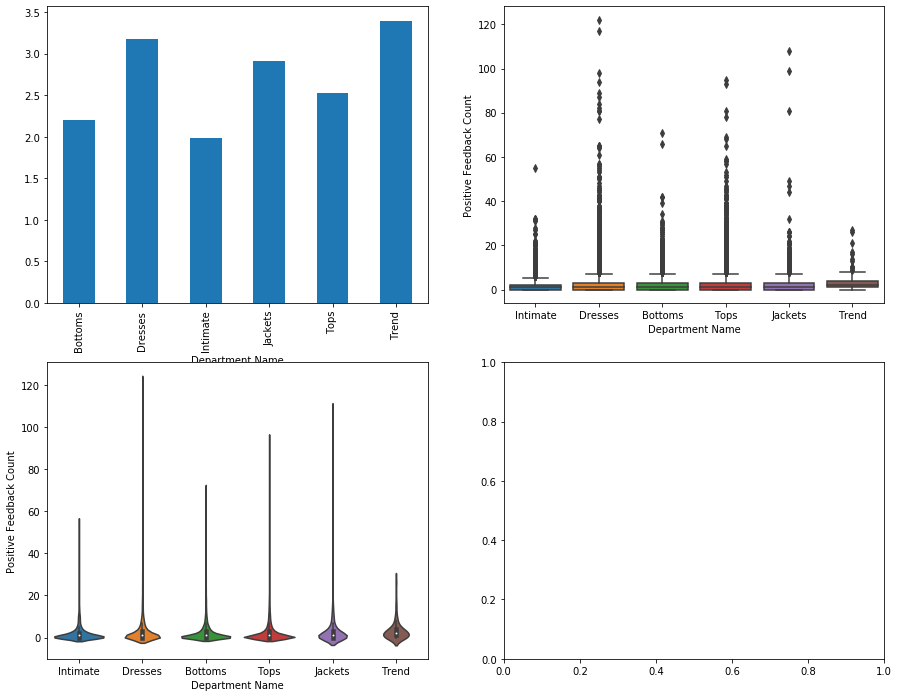

In [71]:
# Quantitative - Qualitative.

# Positive Feedback Count vs Department Name.

fig, axes = plt.subplots(2,2, figsize = (15,12))
df.groupby(['Department Name'])['Positive Feedback Count'].mean().plot(kind = 'bar', ax = axes[0,0])
sns.boxplot(data = df, x = 'Department Name', y = 'Positive Feedback Count', ax = axes[0,1])
sns.violinplot(data = df, x = 'Department Name', y = 'Positive Feedback Count', ax = axes[1,0])
plt.show()

#### Bottoms, Intimates and Tops Department have an average Positive Feedback Count of 2.
#### Dresses, Jackets and Trend Departmnet have an average Positive Feedback Count of 3.
#### We can also see that majority of the Departments reviews has very less or 0 Positive Feedback Count.

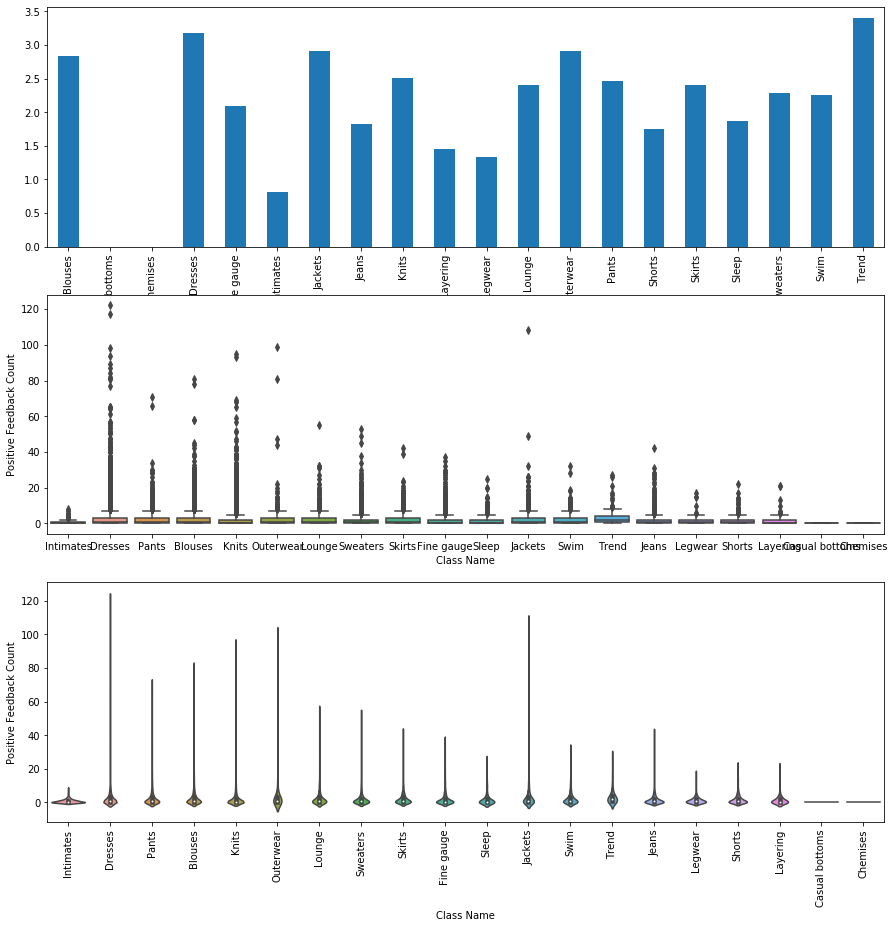

In [72]:
# Quantitative - Qualitative.

# Positive Feedback Count vs Class Name.

fig, axes = plt.subplots(3,1, figsize = (15,15))
df.groupby(['Class Name'])['Positive Feedback Count'].mean().plot(kind = 'bar', ax = axes[0])
sns.boxplot(data = df, x = 'Class Name', y = 'Positive Feedback Count', ax = axes[1])
sns.violinplot(data = df, x = 'Class Name', y = 'Positive Feedback Count', ax = axes[2])
plt.xticks(rotation = 90)
plt.show()

#### Bottoms and Chemises Classes have 0 Positive Feedback Count.
#### Intimates, Layering and Legwear Classes have an average Positive Feedback Count of 1.
#### Fine gauge, Jeans, Knits, Lounge, Pants, Shorts, Skirts, Sleep, Sweaters and Swim Classes have an average Positive Feedback Count of 2.
#### Blouses, Dresses, Jackets, Outerwear and Trend Classes have an average Positive Feedback Count of 3.
#### We can also see that majority of the Classes reviews has very less or 0 Positive Feedback Count.

#### Qualitative - Qualitative.

In [73]:
# Checking the column names of the dataset.
df.columns

Index(['Clothing ID', 'Age', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name', 'Review'],
      dtype='object')

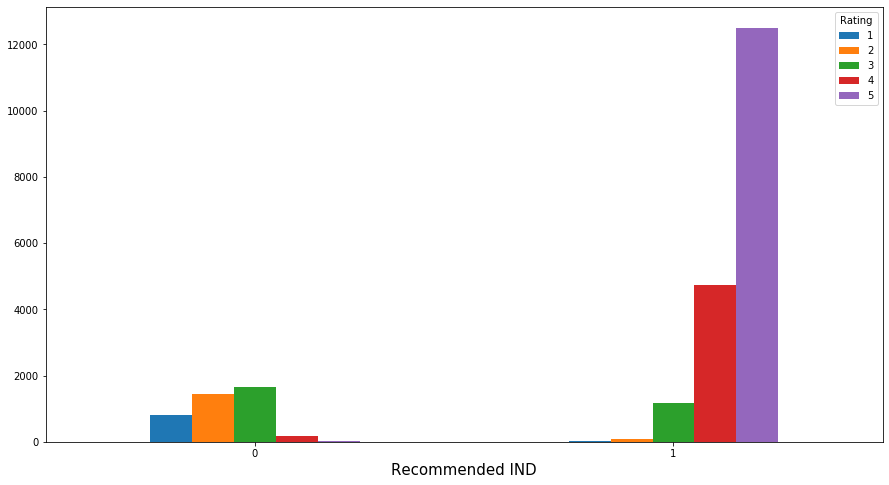

In [74]:
# Qualitative - Qualitative.

# Rating vs Recommended IND.

pd.crosstab(df['Recommended IND'], df['Rating']).plot(kind = 'bar', figsize = (15,8))
plt.xlabel('Recommended IND', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

#### People rated 5 and 4 star rating for the product are more who has recommended and few 5 and 4 star rated product are not recommended also.
#### Majority of the 1,2 and 3 star rated products are not recommended and few of 1,2 and 3 star rated products are recommended also.

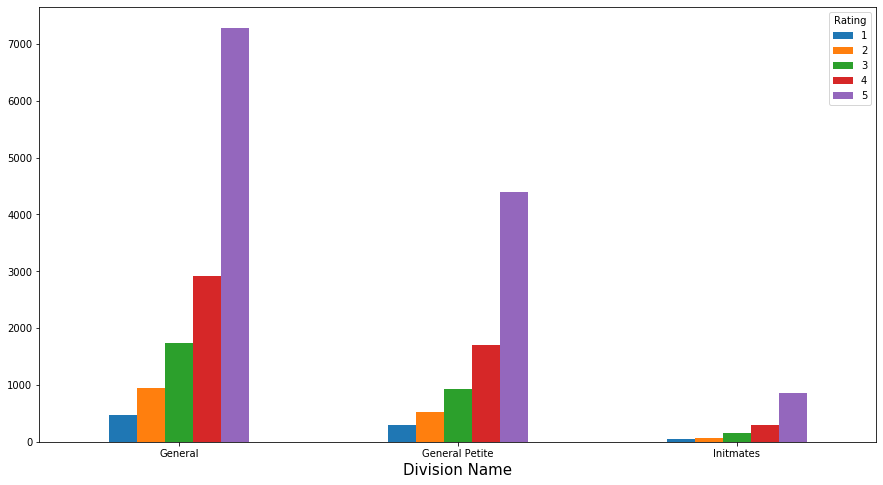

In [75]:
# Qualitative - Qualitative.

# Rating vs Division.

pd.crosstab(df['Division Name'], df['Rating']).plot(kind = 'bar', figsize = (15,8))
plt.xlabel('Division Name', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

#### General Division products got more number of ratings and Intimates Division got least number of ratings.
#### All 1,2,3,4 and 5 star rating are high in General Division, moderate in General Petite Division and low in Intimates Division.

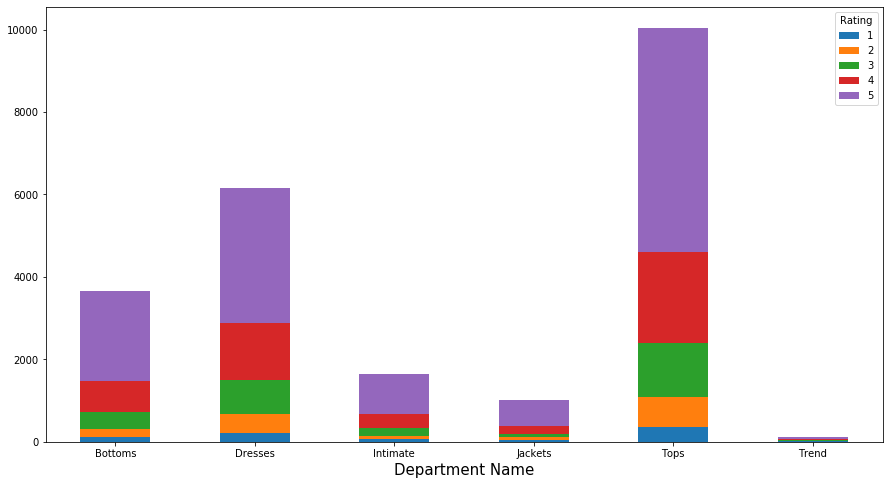

In [76]:
# Qualitative - Qualitative.

# Rating vs Department Name.

pd.crosstab(df['Department Name'], df['Rating']).plot(kind = 'bar',stacked = True, figsize = (15,8))
plt.xlabel('Department Name', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

#### Maximum number of rating are given to Tops Department and Least number of rating are given to Trend Department. 

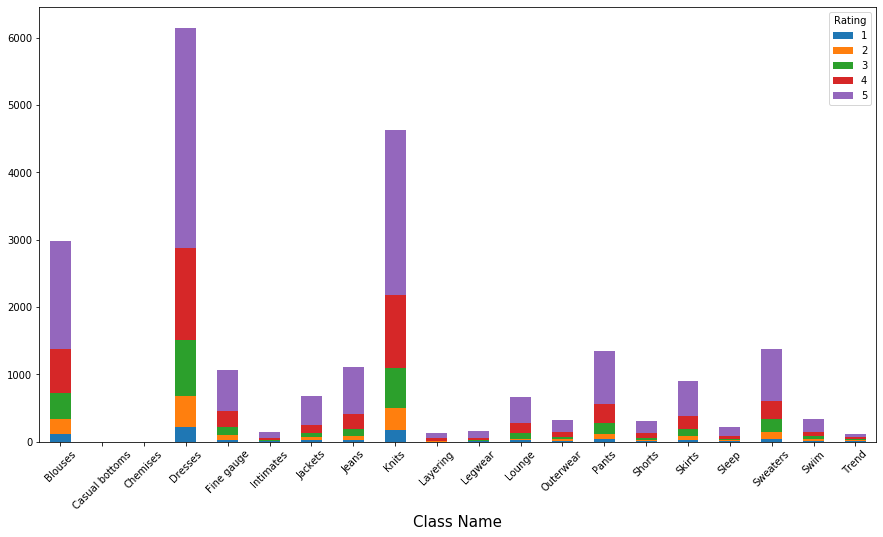

In [77]:
# Qualitative - Qualitative.

# Rating vs Class Name.

pd.crosstab(df['Class Name'], df['Rating']).plot(kind = 'bar',stacked = True, figsize = (15,8))
plt.xlabel('Class Name', fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

#### Maximum number of rating are given to Dresses Class and minimum number of ratings are given to Trend Class.

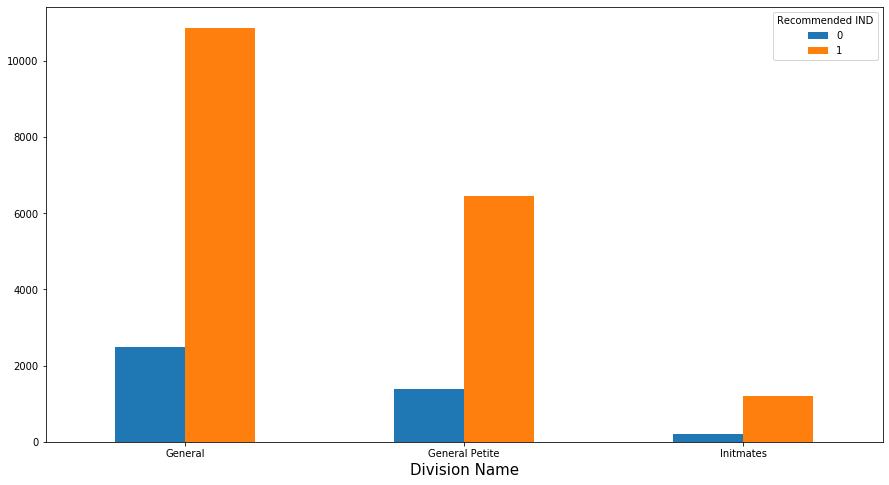

In [78]:
# Qualitative - Qualitative.

# Recommended IND vs Division Name.

pd.crosstab(df['Division Name'], df['Recommended IND']).plot(kind = 'bar', figsize = (15,8))
plt.xlabel('Division Name', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

#### Division which is most recommended is General as compared to others and Division which is least recommended is Intimates as compared to others.
#### Division which is most not recommended is also General as compared to others and Division which is least not recommended is also Intimates as compared to others.

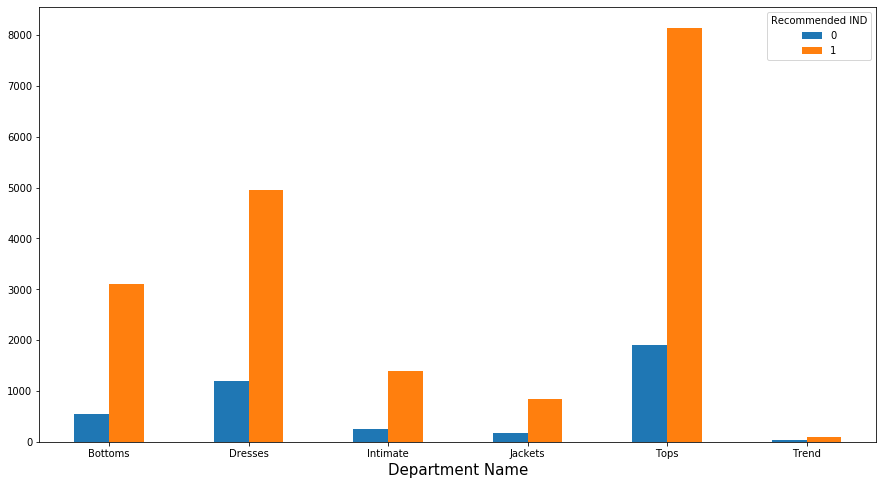

In [79]:
# Qualitative - Qualitative.

# Recommended IND vs Department Name.

pd.crosstab(df['Department Name'], df['Recommended IND']).plot(kind = 'bar', figsize = (15,8))
plt.xlabel('Department Name', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

#### Department which is most recommended is Tops as compared to others and Department which is least recommended is Trend as compared to others.
#### Department which is most not recommended is also Tops as compared to others and Department which is least not recommended is also Trend as compared to others.

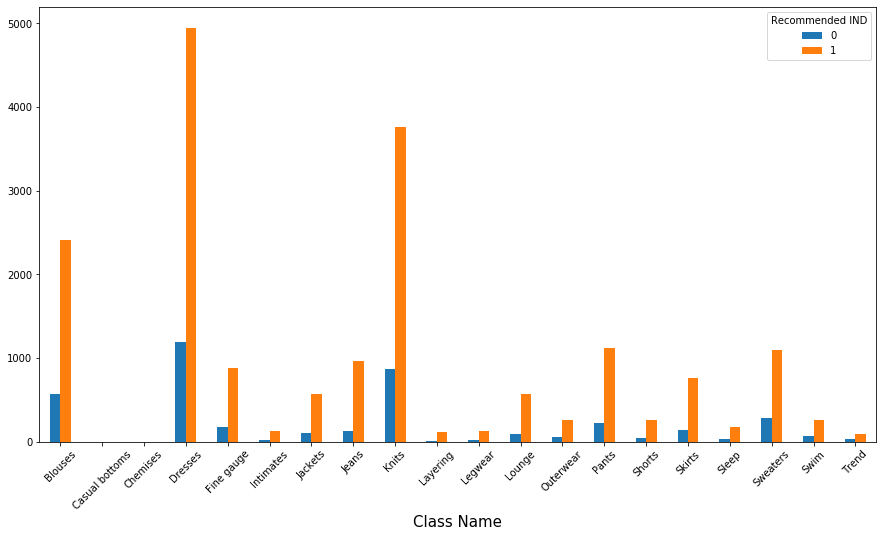

In [80]:
# Qualitative - Qualitative.

# Recommended IND vs Class Name.

pd.crosstab(df['Class Name'], df['Recommended IND']).plot(kind = 'bar', figsize = (15,8))
plt.xlabel('Class Name', fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

#### Class which is most recommended is Dresses as compared to others and Class which are least recommended are Casual bottoms and Chemises as compared to others.
#### Class which is most not recommended is also Dresses as compared to others and Class which are least not recommended are also Casual bottoms and Chemises as compared to others.

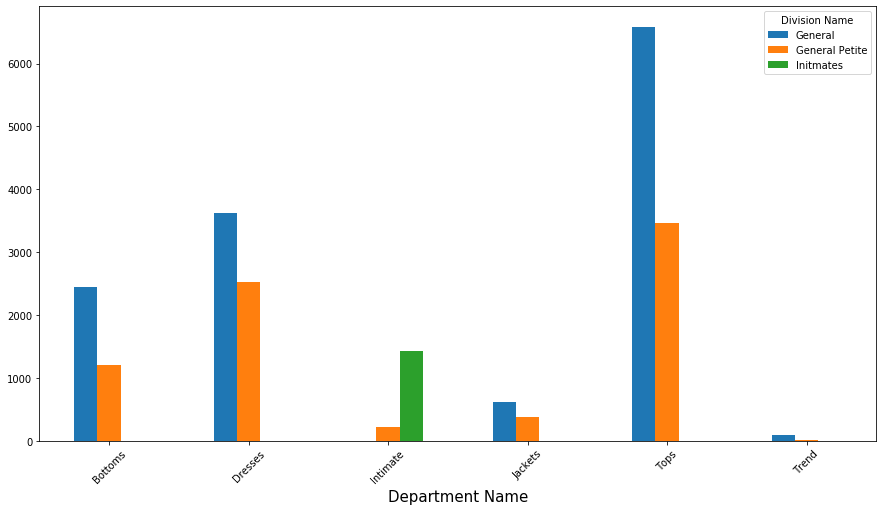

In [81]:
# Qualitative - Qualitative.

# Division Name vs Department Name.

pd.crosstab(df['Department Name'], df['Division Name']).plot(kind = 'bar', figsize = (15,8))
plt.xlabel('Department Name', fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

In [82]:
# Creating a cross tab between two catagorical variables.
pd.crosstab(df['Department Name'], df['Division Name'])

Division Name,General,General Petite,Initmates
Department Name,,,
Bottoms,2447,1215,0
Dresses,3620,2526,0
Intimate,0,227,1426
Jackets,624,378,0
Tops,6580,3468,0
Trend,95,23,0


#### All Departments fall under General Petite Division.
#### All Department except Intimate fall under General Division.
#### Only Intimate Department fall under Intimates Division.

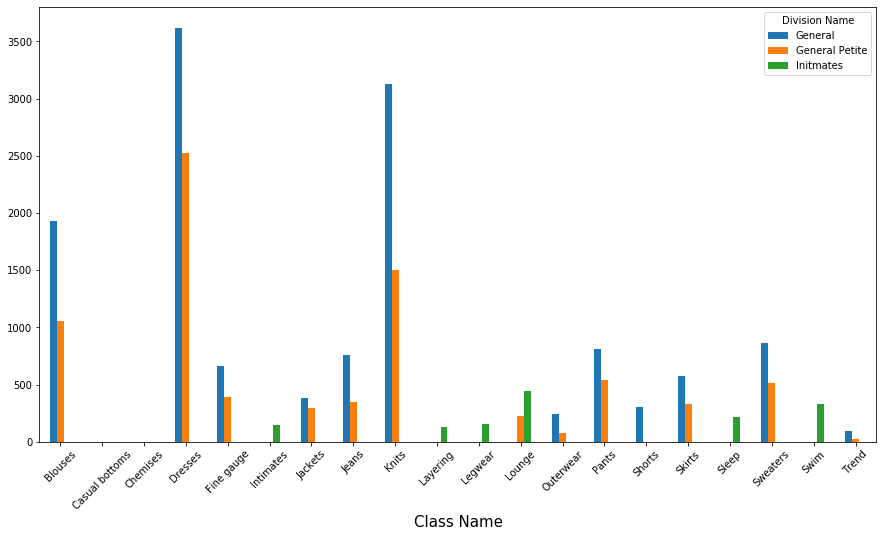

In [83]:
# Qualitative - Qualitative.

# Division Name vs Class Name.

pd.crosstab(df['Class Name'], df['Division Name']).plot(kind = 'bar', figsize = (15,8))
plt.xlabel('Class Name', fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

In [84]:
# Creating a cross tab between two catagorical variables.
pd.crosstab(df['Class Name'], df['Division Name'])

Division Name,General,General Petite,Initmates
Class Name,,,
Blouses,1928,1055,0
Casual bottoms,1,0,0
Chemises,0,0,1
Dresses,3620,2526,0
Fine gauge,663,396,0
Intimates,0,0,147
Jackets,383,300,0
Jeans,756,348,0
Knits,3125,1501,0


#### Classes like Chemises, Intimates, Layering, Legwear, Lounge, Sleep and Swim fall under the Division Intimates.
#### Classes like Blousee, Casual bottoms, Dresses, Fine gauge, Jackets, Jeans, Knits, Outerwear, Pants, Shorts, Skirts, Sweaters and Trend fall under General and General Petite Division.

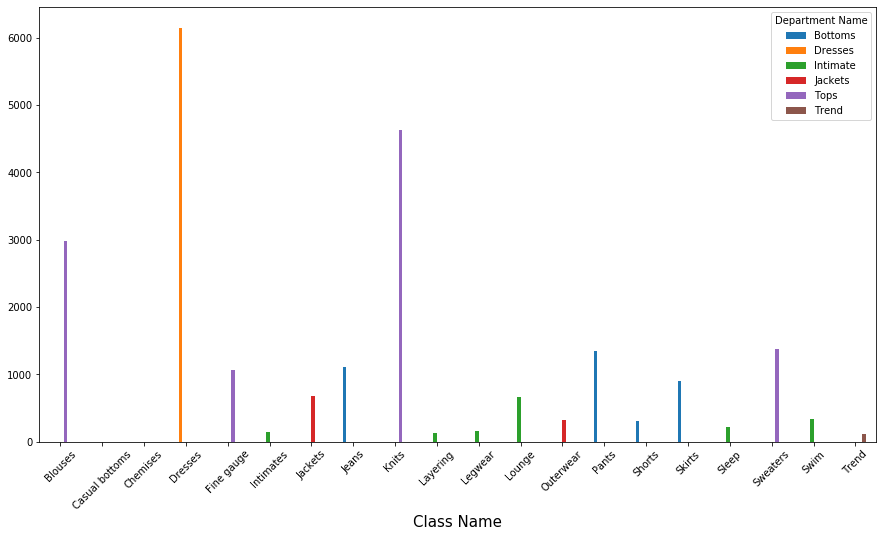

In [85]:
# Qualitative - Qualitative.

# Department Name vs Class Name.

pd.crosstab(df['Class Name'], df['Department Name']).plot(kind = 'bar', figsize = (15,8))
plt.xlabel('Class Name', fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

In [86]:
# Creating a cross tab between two catagorical variables.
pd.crosstab(df['Class Name'], df['Department Name'])

Department Name,Bottoms,Dresses,Intimate,Jackets,Tops,Trend
Class Name,,,,,,
Blouses,0,0,0,0,2983,0
Casual bottoms,1,0,0,0,0,0
Chemises,0,0,1,0,0,0
Dresses,0,6146,0,0,0,0
Fine gauge,0,0,0,0,1059,0
Intimates,0,0,147,0,0,0
Jackets,0,0,0,683,0,0
Jeans,1104,0,0,0,0,0
Knits,0,0,0,0,4626,0


#### Class Blouses fall under Tops Department.
#### Class Casual bottoms fall under Bottoms Department.
#### Class Chemises fall under Intimate Department.
#### Class Dresses fall under Dresses Department.
#### Class Fine gauge fall under Tops Department.
#### Class Intimates fall under Intimate Department.
#### Class Jackets fall under Jackets Department.
#### Class Jeans fall under Bottoms Department.
#### Class Knits fall under Tops Department.
#### Class Layering fall under Intimate Department.
#### Class Legwear fall under Intimate Department.
#### Class Lounge fall under Intimate Department.
#### Class Outerwear fall under Jackets Department.
#### Class Pants fall under Bottoms Department.
#### Class Shorts fall under Bottoms Department.
#### Class Skirts fall under Bottoms Department.
#### Class Sleep fall under Intimate Department.
#### Class Sweaters fall under Tops Department.
#### Class Swim fall under Intimate Department.
#### Class Trend fall under Trend Department.

### Multivariate Analysis.

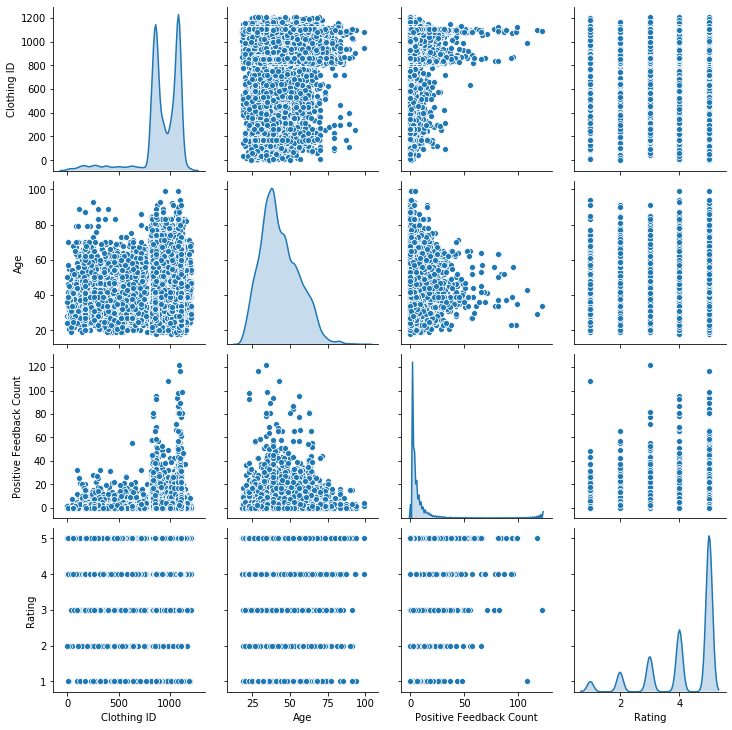

In [87]:
# Pairplot
sns.pairplot(df[['Clothing ID','Age','Positive Feedback Count','Rating']], diag_kind = 'kde')
plt.show()

#### As the Rating increases Positive Feedback Count also increases; they have a positive correlation.

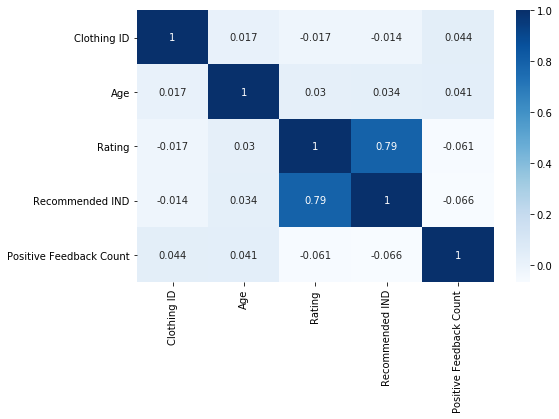

In [88]:
# Heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.show()

#### There is a strong positive correlation between the Rating and Recommended IND (0.79).

### Feature Engineering.

#### Analysis.

In [89]:
df.groupby(['Division Name']).count()['Clothing ID']

Division Name
General           13366
General Petite     7837
Initmates          1426
Name: Clothing ID, dtype: int64

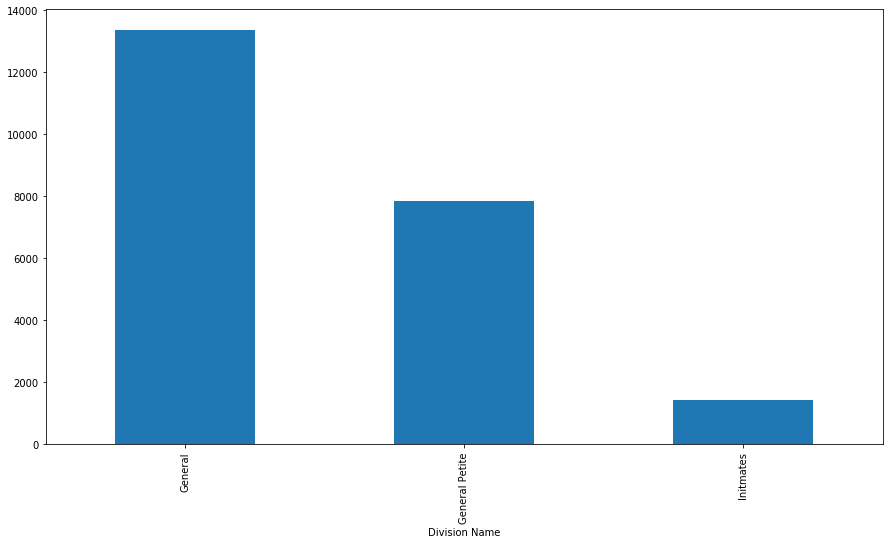

In [90]:
plt.figure(figsize = (15,8))
df.groupby(['Division Name']).count()['Clothing ID'].plot(kind = 'bar')
plt.show()

#### General Division has highest number of reviews and least are from Intimates Division.

In [91]:
df.groupby(['Department Name']).count()['Clothing ID']

Department Name
Bottoms      3662
Dresses      6146
Intimate     1653
Jackets      1002
Tops        10048
Trend         118
Name: Clothing ID, dtype: int64

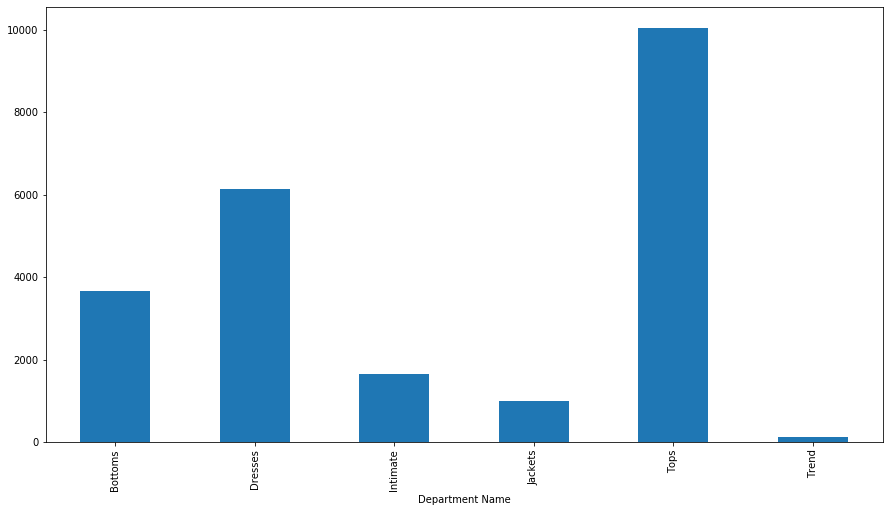

In [92]:
plt.figure(figsize = (15,8))
df.groupby(['Department Name']).count()['Clothing ID'].plot(kind = 'bar')
plt.show()

#### Tops Department has highest number of reviews and least are from Trend Department.

In [93]:
df.groupby(['Class Name']).count()['Clothing ID']

Class Name
Blouses           2983
Casual bottoms       1
Chemises             1
Dresses           6146
Fine gauge        1059
Intimates          147
Jackets            683
Jeans             1104
Knits             4626
Layering           132
Legwear            158
Lounge             669
Outerwear          319
Pants             1350
Shorts             304
Skirts             903
Sleep              214
Sweaters          1380
Swim               332
Trend              118
Name: Clothing ID, dtype: int64

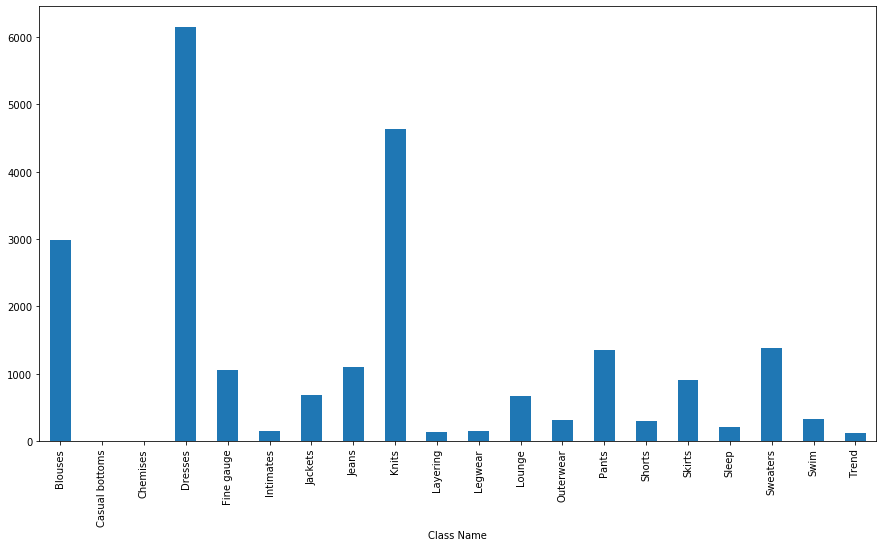

In [94]:
plt.figure(figsize = (15,8))
df.groupby(['Class Name']).count()['Clothing ID'].plot(kind = 'bar')
plt.show()

#### Dresses Class has the highest number of reviews and least are from Casual bottoms and Chemises Class.

In [95]:
df.groupby(['Division Name', 'Department Name']).count()['Clothing ID']

Division Name   Department Name
General         Bottoms            2447
                Dresses            3620
                Jackets             624
                Tops               6580
                Trend                95
General Petite  Bottoms            1215
                Dresses            2526
                Intimate            227
                Jackets             378
                Tops               3468
                Trend                23
Initmates       Intimate           1426
Name: Clothing ID, dtype: int64

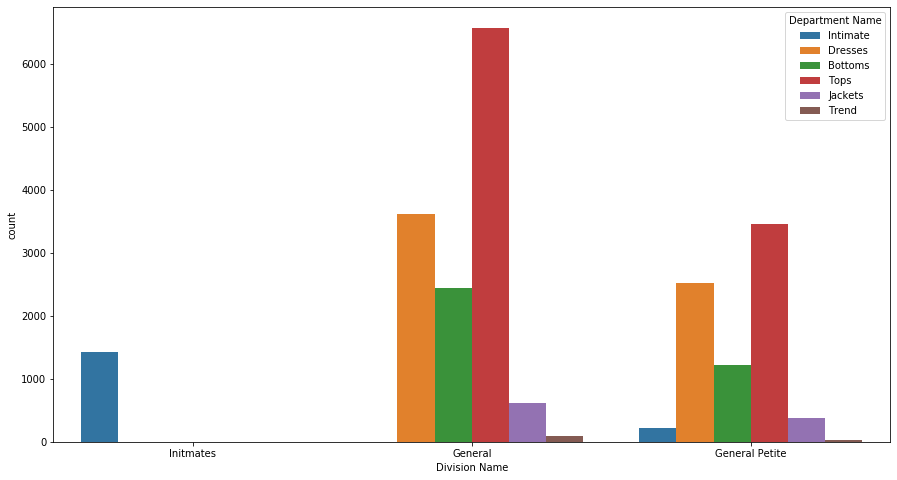

In [96]:
plt.figure(figsize = (15,8))
sns.countplot(data = df, x = 'Division Name', hue = 'Department Name')
plt.show()

#### General Division Tops Department has highest number of reviews.
#### General Petite Division Trend Department has least number of reviews.

#### As we can see above; General and General Petite Division have almost same Departments except the Intimate Department which is present in the General Petite.

In [97]:
df.groupby(['Department Name','Class Name']).count()['Clothing ID']

Department Name  Class Name    
Bottoms          Casual bottoms       1
                 Jeans             1104
                 Pants             1350
                 Shorts             304
                 Skirts             903
Dresses          Dresses           6146
Intimate         Chemises             1
                 Intimates          147
                 Layering           132
                 Legwear            158
                 Lounge             669
                 Sleep              214
                 Swim               332
Jackets          Jackets            683
                 Outerwear          319
Tops             Blouses           2983
                 Fine gauge        1059
                 Knits             4626
                 Sweaters          1380
Trend            Trend              118
Name: Clothing ID, dtype: int64

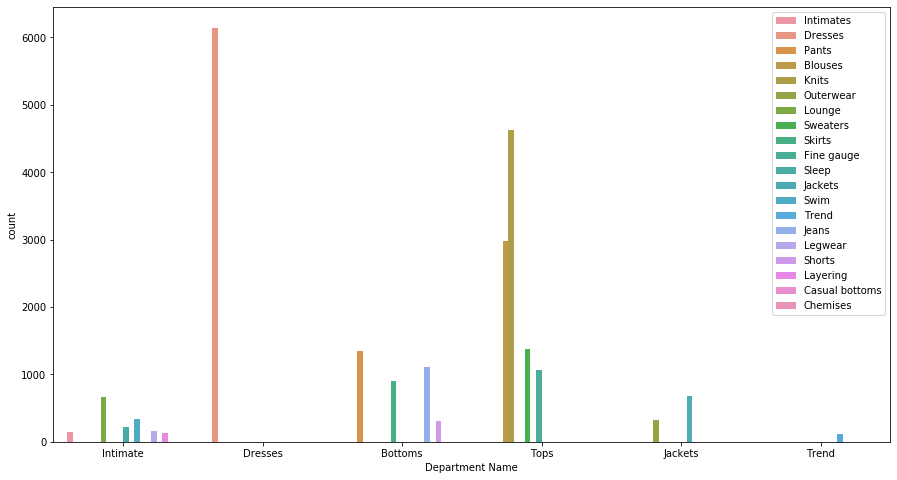

In [99]:
plt.figure(figsize = (15,8))
sns.countplot(data = df, x = 'Department Name', hue = 'Class Name')
plt.legend(loc = 'upper right')
plt.show()

#### Dresses Department Dresses Class has highest number of reviews.
#### Bottoms Department Casual bottoms Class and Intimate Department Chemises Class have least number of reviews.

In [119]:
df.groupby(['Division Name', 'Class Name']).count()['Clothing ID']

Division Name   Class Name    
General         Blouses           1928
                Casual bottoms       1
                Dresses           3620
                Fine gauge         663
                Jackets            383
                Jeans              756
                Knits             3125
                Outerwear          241
                Pants              811
                Shorts             304
                Skirts             575
                Sweaters           864
                Trend               95
General Petite  Blouses           1055
                Dresses           2526
                Fine gauge         396
                Jackets            300
                Jeans              348
                Knits             1501
                Lounge             227
                Outerwear           78
                Pants              539
                Skirts             328
                Sweaters           516
                Trend            

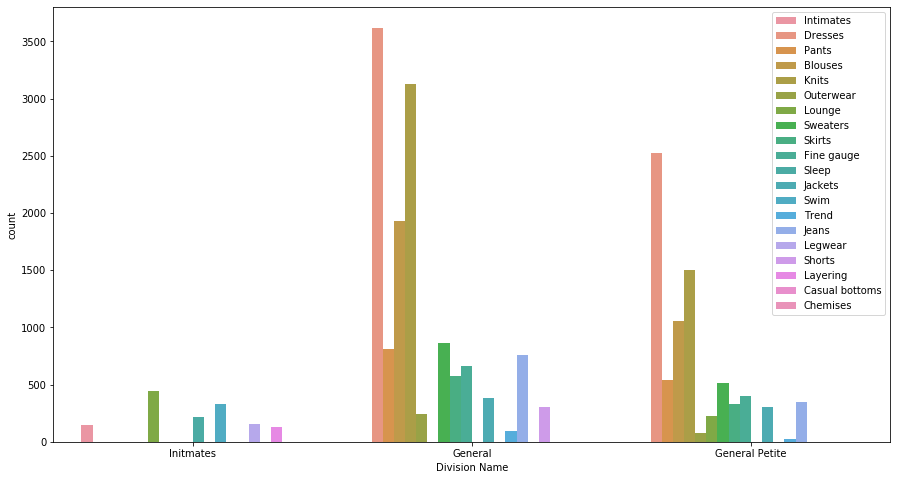

In [100]:
plt.figure(figsize = (15,8))
sns.countplot(data = df, x = 'Division Name', hue = 'Class Name')
plt.legend(loc = 'upper right')
plt.show()

#### General Division Dresses Class Has the highest number of reviews.
#### General Division Casual bottoms Class and Intimates Division Chemises Class have the least number of reviews.

#### Here also we can see that General and General Petite Divisions has most of the same Classes.

In [120]:
df.groupby(['Division Name','Department Name','Class Name']).count()['Clothing ID']

Division Name   Department Name  Class Name    
General         Bottoms          Casual bottoms       1
                                 Jeans              756
                                 Pants              811
                                 Shorts             304
                                 Skirts             575
                Dresses          Dresses           3620
                Jackets          Jackets            383
                                 Outerwear          241
                Tops             Blouses           1928
                                 Fine gauge         663
                                 Knits             3125
                                 Sweaters           864
                Trend            Trend               95
General Petite  Bottoms          Jeans              348
                                 Pants              539
                                 Skirts             328
                Dresses          Dresses           2526


#### General Division - Dresses Department - Dresses Class has the highest number of reviews.
#### General Division - Bottoms Department - Casual bottoms Class and Intimates Division - Intimate Department - Chemises Class have the least number of reviews.

#### Majority of the General Division's Departments and Classes are same as that of the General Petite Division's Departments and Classes.

In [133]:
# Checking the number of unique elements.
df['Clothing ID'].nunique()

1172

In [134]:
# Checking the % of value counts.
df['Clothing ID'].value_counts(normalize = True) * 100

1078    4.361660
862     3.438066
1094    3.248045
1081    2.479120
872     2.293517
829     2.262583
1110    2.081400
868     1.829511
895     1.696938
936     1.537850
867     1.471563
850     1.431791
1095    1.427372
863     1.285960
1059    1.268284
1077    1.268284
1086    1.250608
1080    1.237350
860     1.219674
1083    1.078262
861     1.007557
873     0.985461
1092    0.967785
828     0.941270
1033    0.936851
927     0.914755
1056    0.910336
820     0.892660
836     0.870564
1022    0.861726
1072    0.844050
1008    0.795439
1104    0.777763
984     0.733572
831     0.698219
1020    0.693800
833     0.671704
877     0.671704
854     0.640771
834     0.631932
1082    0.627513
864     0.623094
835     0.614256
1099    0.587741
1035    0.583322
865     0.561227
940     0.556808
907     0.552389
1087    0.547969
909     0.534712
1025    0.525874
875     0.508197
866     0.503778
975     0.499359
1068    0.486102
830     0.464006
1037    0.455168
823     0.450749
1060    0.4463

### Conclusion of the analysis:

#### We can merge General and General Petite Divisions as they contain almost same Departments and Classes.
#### And the Departments and the Classes which are not same in the both Divisions can either be put to Intimate Division or if the count of that department or class is less then it can be dropped.
#### The number of unique values in the Clothing ID columns is 1172 and as we see the value counts, the highest % is 4% and it is a nominal data; so it is better to drop the column.
#### The correlation of Rating and Recommended IND is high as 0.79 and as we choose our target to be Recommended IND ; we can drop Rating column.